# **Etapa 1: Contextualização do Problema e Exploração de Dados**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive")

In [ ]:
!ls

 bq-results-20230331-115425-1680266314785   Projeto_Machine_Learning
'Colab Notebooks'			    sd254_cards.csv
 creditcard_2023.csv			    sd254_users.csv
 EXP.csv				   'teste  ideia2001'
 fakefriends_df.ipynb			    User0_credit_card_transactions.csv
 projetobigqueryinfnet.csv		    xxxxxxxxxxx.png


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=b6fdde62de7d2f0756be6d7737069f67a65c9a6117e7f4480a9fdc1c1c99afa9
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("cards").master('local[*]').getOrCreate()

In [ ]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType

In [ ]:
#Defição do esquema
schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("V1", DoubleType(), True),
    StructField("V2", DoubleType(), True),
    StructField("V3", DoubleType(), True),
    StructField("V4", DoubleType(), True),
    StructField("V5", DoubleType(), True),
    StructField("V6", DoubleType(), True),
    StructField("V7", DoubleType(), True),
    StructField("V8", DoubleType(), True),
    StructField("V9", DoubleType(), True),
    StructField("V10", DoubleType(), True),
    StructField("V11", DoubleType(), True),
    StructField("V12", DoubleType(), True),
    StructField("V13", DoubleType(), True),
    StructField("V14", DoubleType(), True),
    StructField("V15", DoubleType(), True),
    StructField("V16", DoubleType(), True),
    StructField("V17", DoubleType(), True),
    StructField("V18", DoubleType(), True),
    StructField("V19", DoubleType(), True),
    StructField("V20", DoubleType(), True),
    StructField("V21", DoubleType(), True),
    StructField("V22", DoubleType(), True),
    StructField("V23", DoubleType(), True),
    StructField("V24", DoubleType(), True),
    StructField("V25", DoubleType(), True),
    StructField("V26", DoubleType(), True),
    StructField("V27", DoubleType(), True),
    StructField("V28", DoubleType(), True),
    StructField("Amount", DoubleType(), True),
    StructField("Class", IntegerType(), True)
])

#Ler o CSV com o esquema definido
data = spark.read.csv("creditcard_2023.csv", header=True, schema=schema)

#Mostrar o esquema
data.printSchema()


root
 |-- id: integer (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nullab

In [ ]:
#Mostrar dataframe
data.show()

+---+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------+-----+
| id|                  V1|                  V2|                V3|                  V4|                  V5|                  V6|                 V7|                  V8|                  V9|                V10|                 V11|               V12|                 V13|                V14|                 V15|                 V16|                V17|                 V18|                 V19|    

# **Etapa 2: Pré-processamento dos Dados**

In [ ]:
#Tratamento de possíveis valores ausentes
data = data.dropna()

In [ ]:
data.show()

+---+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------+-----+
| id|                  V1|                  V2|                V3|                  V4|                  V5|                  V6|                 V7|                  V8|                  V9|                V10|                 V11|               V12|                 V13|                V14|                 V15|                 V16|                V17|                 V18|                 V19|    

In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

#VectorAssembler para criar uma coluna de recursos
feature_columns = data.columns[:-1]

# Eliminação sa coluna "Class" das features
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

#StandardScaler para normalizar os recursos
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

#Pipeline para executar as etapas em sequência
pipeline = Pipeline(stages=[vector_assembler, scaler])

#Ajuste do pipeline aos dados (isso criará a coluna "features" e "scaledFeatures")
pipeline_model = pipeline.fit(data)
data = pipeline_model.transform(data)


In [ ]:
#Divisão dos dados em conjuntos de treinamento e teste
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# **Etapa 3: Treinamento do Modelo**

In [ ]:
#Inicialização do modelo de classificação (Random Forest)
from pyspark.ml.classification import RandomForestClassifier
rf_classifier = RandomForestClassifier(featuresCol="scaledFeatures", labelCol="Class", numTrees=100, maxDepth=5, seed=42)

In [ ]:
#Treino do modelo com o conjunto de treinamento
model = rf_classifier.fit(train_data)

# **Etapa 4: Avaliação do Modelo**

In [ ]:
#Previsões no conjunto de teste
predictions = model.transform(test_data)

In [ ]:
#Avaliação do modelo
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Class", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc}")

AUC: 0.9999472658281781


# **Etapa 5: Comparação do Desempenho**

In [ ]:
#Avaliação do modelo no conjunto de treinamento
train_predictions = model.transform(train_data)
train_auc = evaluator.evaluate(train_predictions)
print(f"AUC no Conjunto de Treinamento: {train_auc}")


AUC no Conjunto de Treinamento: 0.9999533458183103


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col

In [ ]:

#Avaliação do modelo
evaluator = BinaryClassificationEvaluator(labelCol="Class", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc}")

AUC: 0.9999473085799765


In [ ]:
#Função para calcular precisão, recall e F1-score   *********Recall é o mais importante, pois quanto maior, melhor o desempenho do classificador
def calculate_metrics(predictions):
    true_positives = predictions.filter((col("prediction") == 1) & (col("Class") == 1)).count()
    false_positives = predictions.filter((col("prediction") == 1) & (col("Class") == 0)).count()
    false_negatives = predictions.filter((col("prediction") == 0) & (col("Class") == 1)).count()

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)

    return precision, recall, f1_score

precision, recall, f1_score = calculate_metrics(predictions)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")



Precision: 0.9995415270675366
Recall: 0.9964723944355245
F1-Score: 0.9980046011549838


In [ ]:
#Matriz de confusão para classificação binária
true_positives = predictions.filter((col("prediction") == 1) & (col("Class") == 1)).count()
false_positives = predictions.filter((col("prediction") == 1) & (col("Class") == 0)).count()
true_negatives = predictions.filter((col("prediction") == 0) & (col("Class") == 0)).count()
false_negatives = predictions.filter((col("prediction") == 0) & (col("Class") == 1)).count()

print("Confusion Matrix:")
print(f"True Positives: {true_positives}")
print(f"False Positives: {false_positives}")
print(f"True Negatives: {true_negatives}")
print(f"False Negatives: {false_negatives}")


Confusion Matrix:
True Positives: 85026
False Positives: 39
True Negatives: 85353
False Negatives: 301


In [ ]:
#Filtro para as transações classificadas como fraudes
fraudulent_transactions = predictions.filter(col("prediction") == 1)

In [ ]:
#Contar o número de transações fraudulentas
num_fraudulent_transactions = fraudulent_transactions.count()

In [ ]:
#Número de transações fraudulentas
print(f"Número de transações fraudulentas: {num_fraudulent_transactions}")

In [ ]:
#Transações fraudulentas
fraudulent_transactions.show()


Número de transações fraudulentas: 85065
+-----+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------+-----+--------------------+--------------------+--------------------+--------------------+----------+
|   id|                  V1|                 V2|                 V3|                 V4|                  V5|                 V6|                  V7|                  V8|                  V9|                 V10|               V11|                V12|             

In [ ]:
#Calcular o número total de transações
num_total_transacoes = data.count()

In [ ]:
#Calcular o número de transações fraudulentas
num_fraudulent_transactions = fraudulent_transactions.count()

In [ ]:
#Calcular a porcentagem de fraudes
porcentagem_fraudes = (num_fraudulent_transactions / num_total_transacoes) * 100

In [ ]:
#Porcentagem de fraudes
print(f"Porcentagem de fraudes: {porcentagem_fraudes:.2f}%")


Porcentagem de fraudes: 14.96%


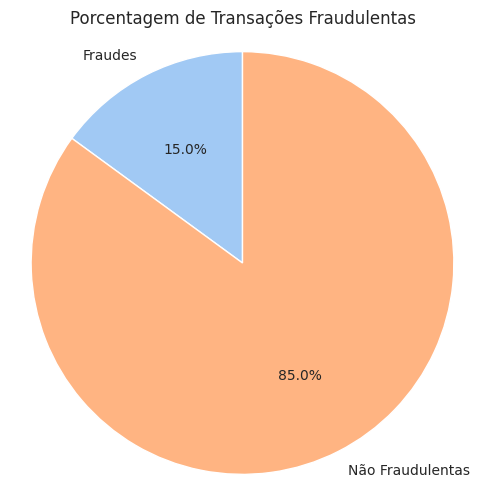

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Dados
labels = ['Fraudes', 'Não Fraudulentas']
sizes = [num_fraudulent_transactions, num_total_transacoes - num_fraudulent_transactions]

#Configuração do estilo do gráfico
sns.set_style("whitegrid")

#Criação do gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Porcentagem de Transações Fraudulentas')

""""O código a seguir garante que o gráfico seja um círculo"""
plt.axis('equal')

#Gráfico
plt.show()
